<a href="https://colab.research.google.com/github/Enkhzol/diveintocode-ml/blob/master/Sprint4_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. About this Sprint​ ​**
The purpose of this Sprint

    Understanding linear regression through scratch
    Get used to object-oriented implementation
    Allow formulas to be incorporated into code

How to learn

After implementing linear regression with scratch, we will train and verify.

**2. Scratch Linear Regression**

We will create a class of linear regression from scratch. We will implement the algorithm using only the minimum library such as NumPy.

The template is prepared below. Add some code to this ScratchLinearRegression class.

**Prototype**

class ScratchLinearRegression():
    """
    Scratch implementation of linear regression
    
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    
    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn linear regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        if self.verbose:
            #Output learning process when verbose is set to True
            print()
        pass
        
    def predict(self, X):
        """
        Estimate using linear regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by linear regression
        """
        pass
        return

【problem1】Hypothetical function

Implement the linear regression hypothetical function represented by the following formula. I have prepared a method template
hθ(x)=θ0x0+θ1x1+...+θjxj+...+θnxn.(x0=1)

$x$: Feature vector

$\theta$: parameter vector

$n$: Number of features

$x_j$: jth feature

$\theta_j$: jth parameter (weight)

The number of features $n$ should be implemented to be able to handle arbitrary values.

The vector format is as follows.
h​ ​θ​ ​(​ ​x​ ​)​ ​=​ ​θ​ ​T​ ​⋅​ ​x​ ​.

** Prototype **

Since it is a method that is never called from outside the class, it is customary in Python to prefix it with an underscore.

def _linear_hypothesis(self, X):
    """
    Compute a linear hypothetical function

    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data

    Returns
    -------
      The following form of ndarray, shape (n_samples, 1)
      Estimated result by linear hypothetical function

    """
    pass
    return

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy.random import *

In [6]:
class ScratchLogisticRegression():
    """
    num_iter : int
    Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data
    """
    def __init__(self, num_iter=100, lr=0.01, C =1, random_state =None, no_bias=True, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.C = C
        self.lamda = 1/self.C
        self.random_state = random_state
        
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
        
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
         Parameters
         ----------
         X: ndarray, shape (n_samples, n_features) of the following form
             Features of training data
         y: ndarray, shape (n_samples,) of the following form
             Correct answer value of training data
         X_val: ndarray, shape (n_samples, n_features) of the following form
             Features of verification data
         y_val: ndarray, shape (n_samples,) of the following form
             Correct value of verification data
        """
        # Get the label value of y
        # np.unique is extracting the type in y Example 0001111222 → 0,1,2
        self.ylabel = np.unique(y)
        
        # Replace the label value of y with 0,1 Since it is a binary classification
        # If not do this, the value of error will fluctuate (?)
        y = np.where(y==self.ylabel[0],0,1)
        
        # bool is a true and false value (True and False)
        if y_val is not None:
            y_val = np.where(y_val==self.ylabel[0],0,1)
        
        # Linear combination: Combined with the bias term
        X = self._linear_combination(X)
        #print(X)
        
        # Give the initial value of the parameter θ as a random number
        np.random.seed(self.random_state)
        self.theta = np.random.rand(X.shape[1])
        
        for i in range(self.iter):
            # Predictive Probability (hypothetical function)
            yhat = self._hypothetical_function(X)
            
            # error
            error = yhat - y
            self.loss[i] = self._loss_function(y,yhat)
            
            if X_val is not None:
                val_X = self._linear_combination(X_val)
                val_yhat = self._hypothetical_function(val_X)
                self.val_loss[i] = self._loss_function(y_val,val_yhat)
            
            self._gradient_descent(X, error)
            
            # save θ
            np.save('theta', self.theta)
            
            # Output the learning process when verbose is set to True
            if self.verbose:
                print('n_iter:', i, 'loss:', self.loss[i], 'theta:', self.theta)
            
        
    
    def _linear_combination(self,X):
        """
        Linear combination

         Parameters
         ----------
         X: ndarray, shape (n_samples, n_features) of the following form
           Training data

         Returns
         ------------
           The following forms of ndarray, shape (n_samples, n_features + 1)
           Linear combination
        """
        # X Bias term
        if self.no_bias == False:
            x0 = np.ones(X.shape[0])
            return np.concatenate([x0.reshape(-1,1),X],axis=1)
        
        return X
           
    def _hypothetical_function(self,X):
        """
        Compute a linear hypothetical function

         Parameters
         ----------
         X: ndarray, shape (n_samples, n_features) of the following form
           Training data

         Returns
         ------------
           The following form of ndarray, shape (n_samples, 1)
           Estimated result by linear hypothetical function

        """
        z = np.dot(X,self.theta)
        
        return 1/(1+np.exp(-z))

    
    def _loss_function(self, y, yhat):
        """
        Compute the loss function of logistic regression.
         Parameters
         ----------
         y: ndarray, shape (n_samples,) of the following form
             Correct answer value of training data
         yhat: ndarray, shape (n_samples,) of the following form
             Correct value of verification data
        """
        
        return np.sum(-y*np.log(yhat) -(1-y)*np.log(1-yhat))/len(y)+(0.5*self.lamda/len(y)*np.sum(self.theta**2))
    
    
    def _gradient_descent(self, X, error):
        """
        The value of θ is updated and learned by the steepest descent method.
         Parameters
         ----------
         X: ndarray, shape (n_samples, n_features) of the following form
             Features of training data
         error: Error between true value and estimated value
        """
        if self.no_bias ==False:
            self.theta[0] -=  self.lr*np.dot(X[:, 0].reshape(-1, 1).T, error)/len(X)
            self.theta[1:] -=  self.lr*(np.dot(X[:, 1:].T, error) + (self.lamda*self.theta[1:]))/len(X)
        
        else:
            self.theta -=  self.lr*(np.dot(error,X) + (self.lamda*self.theta))/len(X)
            
            return self.theta
      
    
    def predict(self, X):
        """
        Estimate the label using logistic regression.
         Parameters
         ----------
         X: ndarray, shape (n_samples, n_features) of the following form
             sample
         Returns
         ------------
             The following form of ndarray, shape (n_samples, 1)
             Estimated result by logistic regression
        """
        X = self._linear_combination(X)
        yhat = self._hypothetical_function(X)
        
        return np.where(yhat<0.5,self.ylabel[0],self.ylabel[1])
    
    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.
         Parameters
         ----------
         X: ndarray, shape (n_samples, n_features) of the following form
             sample
         Returns
         ------------
             The following form of ndarray, shape (n_samples, 1)
             Estimated result by logistic regression
        """
        X = self._linear_combination(X)
        
        return self._hypothetical_function(X)


# Test
x1 = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]])
x0 = np.ones([x1.shape[0]])
print(x1), print(x1.shape)
print(x0), print(x0.shape)


[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(10, 1)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(10,)


(None, None)

In [20]:
class ScratchLinearRegression():
    """
    Scratch implementation of linear regression
    
     Parameters
     ----------
     num_iter: int
       Number of iterations
     lr: float
       Learning rate
     no_bias: bool
       True if no bias term is included
     verbose: bool
       True to output the learning process
    
     Attributes
     ----------
     self.coef_: ndarray, shape (n_features,) of the following form
       Parameters
     self.loss: ndarray of the following form, shape (self.iter,)
       Recording losses for training data
     self.val_loss: ndarray, shape (self.iter,) of the following form
       Recording losses for validation data
    """
    
    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False):
        # hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self,X):
        """
       Compute a linear hypothetical function

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
           Training data

        Returns
        -------
          The following form of ndarray, shape (n_samples, 1)
          Estimated result by linear hypothetical function

        """
        x1 = X
        
        # x0 Creation of (bias term)
        if self.no_bias == True:
            x0 = np.zeros(x1.shape[0])
        else:
            x0 = np.ones(x1.shape[0])
    
        return np.concatenate([x0.reshape(-1,1),x1],axis=1)
    
    
    def _gradient_descent(self, X, error):
        """
        The value of θ is updated and learned by the steepest descent method.
         Parameters
         ----------
         X: ndarray, shape (n_samples, n_features) of the following form
             Features of training data
         error: Error between true value and estimated value
        """
        self.theta = self.theta - self.lr*np.dot(error, X)/len(X)
        
        
    def fit(self, X, y, X_val=False, y_val=False):
        """
        Learn linear regression.
         If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
         Parameters
         ----------
         X: ndarray, shape (n_samples, n_features) of the following form
             Features of training data
         y: ndarray, shape (n_samples,) of the following form
             Correct answer value of training data
         X_val: ndarray, shape (n_samples, n_features) of the following form
             Features of verification data
         y_val: ndarray, shape (n_samples,) of the following form
             Correct value of verification data
        """
        x1 = self._linear_hypothesis(X)
        
        # Give the initial value of the parameter θ as a random number (the initial value may be appropriate)
        self.theta = np.random.random(x1.shape[1])
        
        for i in range(self.iter):
            
            # Calculate predicted value with hypothetical function
            y1 = np.dot(x1,self.theta)
            
            # Calculate the error between the true value and the predicted value
            error = y1 - y
            self.loss[i] += np.mean(error**2)/2
            
            # X_valid read as x2
            if (type(X_val) != bool):
                x2 = self._linear_hypothesis(X_val)
                y2 = np.dot(x2,self.theta)
                
                error_val = y2 - y_val
                self.val_loss[i] += np.mean(error_val**2)/2 
            
            # Optimization of parameter θ by steepest descent method
            self._gradient_descent(x1, error)
            
            if self.verbose:
            #Output the learning process when verbose is set to True
                print('n_iter:', i,
                      'loss:',self.loss[i],
                      'theta:',self.theta)
                
    def predict(self, X):
        """
        Estimate using linear regression.
         Parameters
         ----------
         X: ndarray, shape (n_samples, n_features) of the following form
             sample
         Returns
         ------------
             The following form of ndarray, shape (n_samples, 1)
             Estimated result by linear regression
        """

        return np.dot(self._linear_hypothesis(X),self.theta)

In [7]:
#In reshape (-1,1), -1 means to change the number of data to the number of rows, and 1 means to change the number of columns to 1.
X = np.concatenate([x0.reshape(-1,1),x1],axis=1)
print(X), print(X.shape)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]
(10, 2)


(None, None)

In [8]:
#random.random returns a random number of 0.0 or more and less than 1.0. Change the number returned by the argument in ().
theta = np.random.random(X.shape[1])
print(theta)

[0.29907517 0.91805081]


In [9]:
np.dot(X, theta), np.dot(X, theta).shape

(array([0.29907517, 1.21712599, 2.1351768 , 3.05322761, 3.97127843,
        4.88932924, 5.80738005, 6.72543087, 7.64348168, 8.5615325 ]), (10,))

**【problem2】Steepest descent**

Implement the steepest descent method for training. Add a method _gradient_descent that updates the parameters as in the following equation, and
Please it call from the fit method.

In [10]:
# Calculate only once outside the function
x1 = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8]]) #Training data
y = np.array([2,4,2,1,6,7,8,5,2]) #Measured value

print(x1), print(x1.shape)
print(y), print(y.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
(9, 1)
[2 4 2 1 6 7 8 5 2]
(9,)


(None, None)

def _gradient_descent(self, X, error):
    """
    Write a description
    """
    pass

In [12]:
x0 = np.ones(x1.shape[0]) 
X = np.concatenate([x0.reshape(-1,1),x1],axis=1)
theta = np.random.random(X.shape[1])
print(x0)
print(x0.shape)
print(X)
print(X.shape)
print(theta)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
(9,)
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]]
(9, 2)
[0.83028582 0.50289658]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
(9,)
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]]
(9, 2)
[0.61986155 0.51471806]


In [13]:
y1 = np.dot(X,theta) #y1 is the predicted value (variable multiplied by parameter → y_hat = ax)
print(y1)
print(type(y1))

[0.61986155 1.1345796  1.64929766 2.16401571 2.67873377 3.19345182
 3.70816988 4.22288793 4.73760599]
<class 'numpy.ndarray'>


In [14]:
error = (y1 - y)
print(error)
print(error.shape)

[-1.38013845 -2.8654204  -0.35070234  1.16401571 -3.32126623 -3.80654818
 -4.29183012 -0.77711207  2.73760599]
(9,)


In [15]:
alpha = 0.01
theta[0] = theta[0] - alpha*np.mean(error*x0)
theta[1] = theta[1] - alpha*np.mean(error*x1)
print(theta[0])
print(theta[1])
print(np.mean(error*x0))
print(np.mean(error*x1))

0.6341853214887125
0.572013148801707
-1.4323773426693625
-5.72950937067745


In [16]:

np.dot(error, X)

array([-12.89139608, -41.68250103])

In [52]:
#Try updating #θ once
x1 = np.array([0,1,2,3,4,5,6,7,8])
y = np.array([2,4,2,1,6,7,8,5,2])

x0 = np.ones(x1.shape[0])
X = np.concatenate([x0.reshape(-1,1),x1.reshape(-1,1)],axis=1)
theta = np.random.random(2)
y1 = np.dot(X,theta)

alpha = 0.01

error = (y1 - y)
print('Before update:', theta)
theta = theta - alpha*np.dot(error,X)/len(X)
print('after update:', theta)

Before update: [0.1976168  0.22837225]
after update: [0.22761685 0.35648098]


**problem 3 Estimated**

Please implement the estimation mechanism. Add it to the predict method included in the template of the ScratchLinearRegression class.

The output of the hypothetical function $h_\theta(x)$ is the estimation result.

In [53]:
X = np.random.randn(30,1)
y = np.random.randn(30,)
X_test = np.random.randn(5,1)

print(X)
print(y)
print(X_test)

[[ 0.3713051 ]
 [ 0.30700535]
 [-0.30443776]
 [-0.59513186]
 [-0.80104994]
 [-0.85420789]
 [ 0.32604706]
 [ 1.15568169]
 [-1.96486009]
 [-1.85028487]
 [ 1.95024396]
 [ 0.71133761]
 [ 0.02948702]
 [ 0.77025999]
 [-0.10178885]
 [-1.46516917]
 [ 0.06116404]
 [ 1.33208017]
 [-0.07744665]
 [ 0.95482175]
 [-0.45544626]
 [-0.35975066]
 [ 1.31548193]
 [-1.41065664]
 [ 1.5433783 ]
 [-0.25212322]
 [-0.98821518]
 [-0.63463792]
 [-0.05074275]
 [ 1.41846159]]
[-0.84416803 -2.74077152 -0.1834119   0.21561166  1.84445297 -0.55118307
  0.05803158  0.08160884 -0.0372483   2.03343897  0.83930728  0.13000865
 -1.44097705 -0.86230165  0.78493115  1.55155418  1.11041213  0.54144175
  0.41634261  0.44207186 -0.26549845 -1.27652642  1.81905276 -0.86306083
  0.20844459 -1.53213676 -0.41412488  0.6787937   0.39106064 -0.76413507]
[[ 1.19427431]
 [-0.57257828]
 [ 1.44981533]
 [ 0.36232556]
 [ 1.2456666 ]]


X.shape (30, 1)
y.shape (30,)


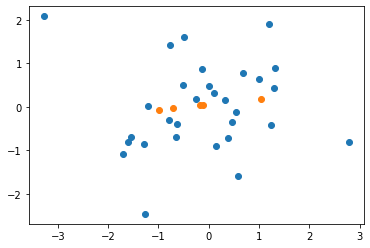

In [21]:
print('X.shape',X.shape)
print('y.shape',y.shape)

reg = ScratchLinearRegression(num_iter=10000, lr=0.0001, verbose=False)

reg.fit(X,y)
y_pred = reg.predict(X_test)

plt.scatter(X,y)
plt.scatter(X_test,y_pred)
plt.plot();

**problem 4 Mean squared error**

Create a function of mean square error (MSE) used as an index value for linear regression.

Since the mean square error function is a function that can be used for regression problems in general, create it as a separate function instead of the method of the ScratchLinearRegression class. We have a template.

The mean square error is expressed by the following formula.


In [54]:
def MSE(y_pred, y):
    """
     Calculation of mean square error
     Parameters
     ----------
     y_pred: ndarray, shape (n_samples,) of the following form
       Estimated value
     y: ndarray, shape (n_samples,) of the following form
       Correct answer value
     Returns
     ----------
     mse: numpy.float
       Mean square error
    """
    mse = np.mean((y-y_pred)**2)
#    mse = np.dot((y-y_pred).T, (y-y_pred))/len(y) 
    
    return mse

    

In [23]:
y_test = np.array([2,4,2,1,6])
y_pred = np.array([2,4,2,4,1])


mse = MSE(y_pred, y_test)
mse

6.8

**problem 5 Objective function**

Implement the objective function (loss function) of linear regression represented by the following formula and be sure to record this inself.loss,self.val_loss.

The objective function (loss function) $J(\theta)$ is the following formula.

In [24]:
print(reg.loss.shape)
reg.loss.reshape(-1,1)

(10000,)


array([[0.62373913],
       [0.62370812],
       [0.62367712],
       ...,
       [0.51904324],
       [0.51904124],
       [0.51903924]])

In [25]:
print(reg.val_loss.shape)
reg.val_loss.reshape(-1,1)

(10000,)


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

**Problem 6 Learning and estimation**

Learn and estimate scratch implementations from the House Prices competition data provided in Sprint, an introduction to machine learning scratch.

Compare this with the scikit-learn implementation and see if it works correctly.


In [59]:
# House Prices
train = pd.read_csv('/content/drive/MyDrive/my_sample_data/HousePricesData/train.csv')
print('shape:',train.shape)
train.head()

shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [60]:
X = train[['YearBuilt']].values
y = train[['SalePrice']].values
y = y.reshape(-1)
print('X.shape:',X.shape)
print('y.shape:',y.shape)

X.shape: (1460, 1)
y.shape: (1460,)


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = \
train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_valid.shape:',X_valid.shape)
print('y_valid.shape:',y_valid.shape)

X_train.shape: (1168, 1)
y_train.shape: (1168,)
X_valid.shape: (292, 1)
y_valid.shape: (292,)


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

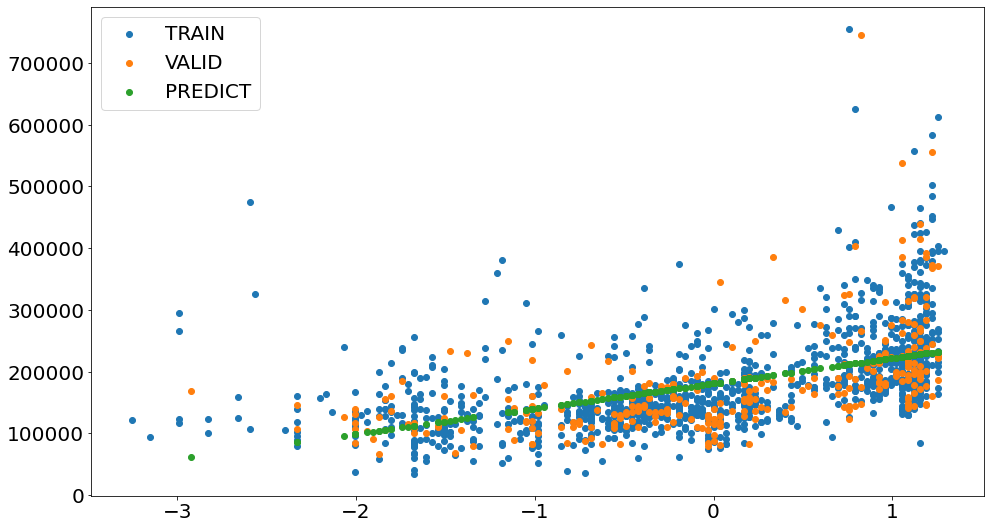

In [63]:
reg1 = ScratchLinearRegression()

reg1.fit(X_train_std,y_train, X_valid_std, y_valid)
y_pred1 = reg1.predict(X_valid_std)

# Visualization of training data, validation data, and forecast data
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std,y_train,label="TRAIN")
plt.scatter(X_valid_std,y_valid,label="VALID")
plt.scatter(X_valid_std,y_pred1,label="PREDICT")
plt.legend()
plt.plot();

In [39]:
mse = MSE(y_pred1, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

from sklearn.linear_model import LinearRegression

reg2 = LinearRegression()

reg2.fit(X_train_std,y_train)
y_pred_sklearn = reg2.predict(X_valid_std)

MSE4980054387.7
RMSE70569.5


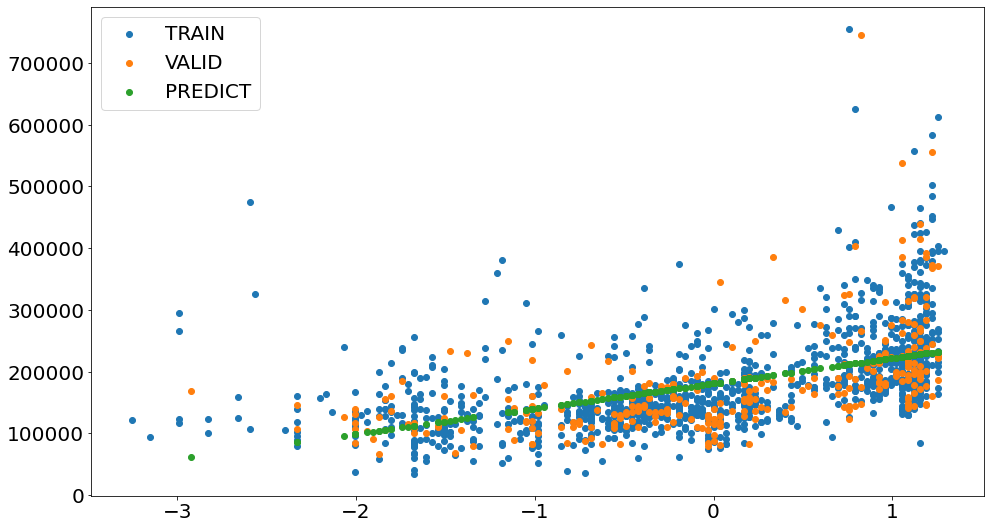

In [40]:
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std,y_train,label="TRAIN")
plt.scatter(X_valid_std,y_valid,label="VALID")
plt.scatter(X_valid_std,y_pred_sklearn,label="PREDICT")
plt.legend()
plt.plot();

In [41]:

mse = MSE(y_pred_sklearn, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE4980069536.6
RMSE70569.6


**Problem 7 Learning curve plot**

Create and execute a function that displays the learning curve. Look at the graph to see if the loss is down properly.

In the template of the linear regression class, the loss is recorded in self.loss and self.val_loss, so please use this for input.

Plot example

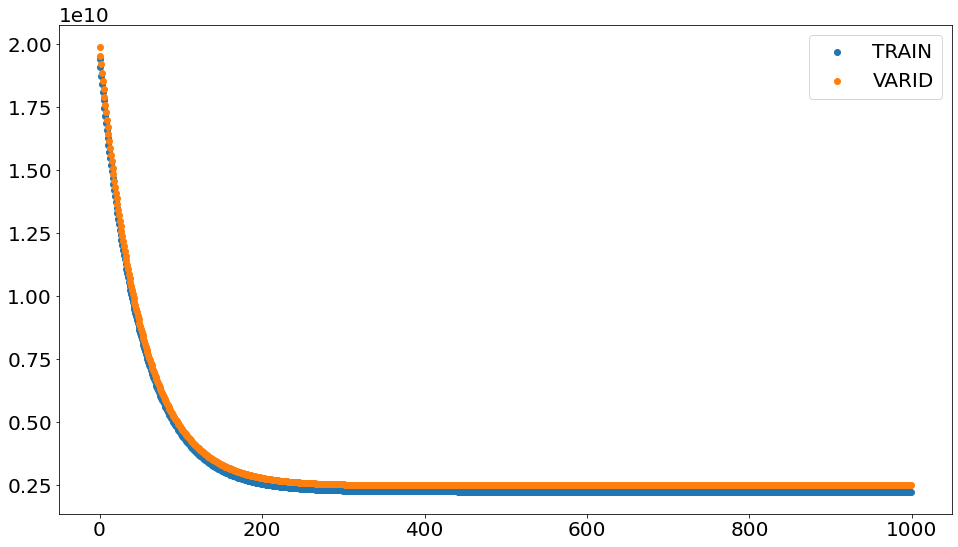

In [64]:
# Learning curve plot
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg1.loss)),reg1.loss,label='TRAIN')
plt.scatter(range(len(reg1.val_loss)),reg1.val_loss,label='VARID')
plt.legend()
plt.plot();

In [43]:
#Change the parameters
reg3 = ScratchLinearRegression(num_iter=5000, lr=0.001)

reg3.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred3 = reg3.predict(X_valid_std)

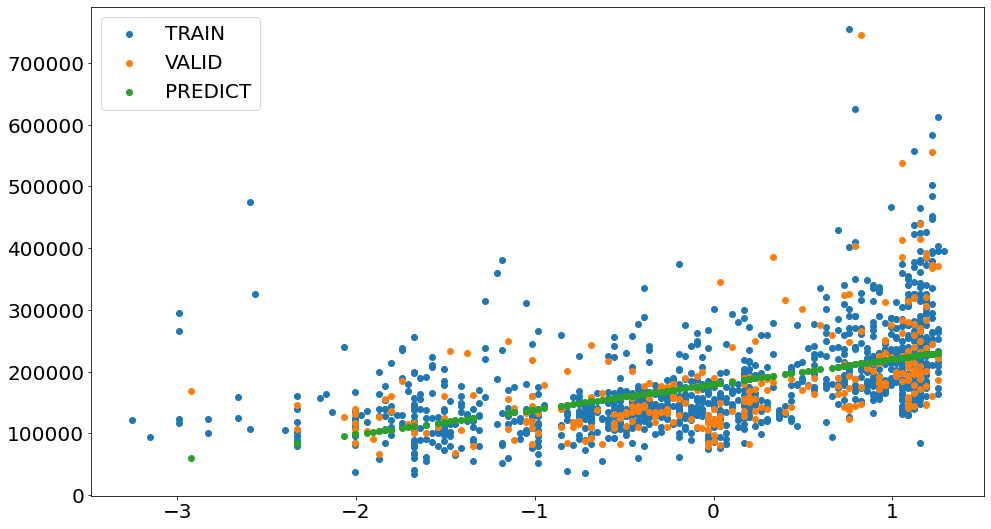

In [44]:
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std,y_train,label="TRAIN")
plt.scatter(X_valid_std,y_valid,label="VALID")
plt.scatter(X_valid_std,y_pred3,label="PREDICT")
plt.legend()
plt.plot();

In [45]:
mse = MSE(y_pred3, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE4979289767.7
RMSE70564.1


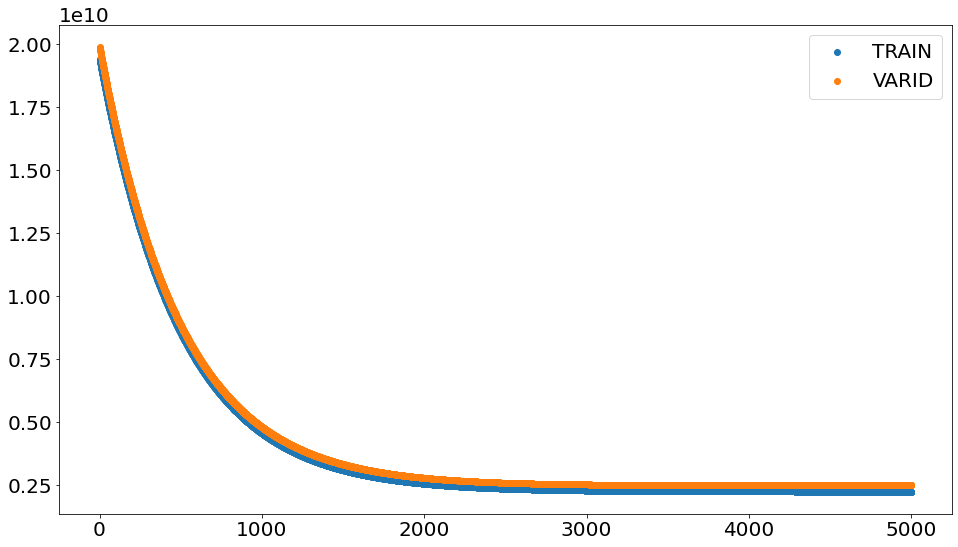

In [65]:
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg3.loss)),reg3.loss,label='TRAIN')
plt.scatter(range(len(reg3.val_loss)),reg3.val_loss,label='VARID')
plt.legend()
plt.plot();

**【problem 8】(Advance task) Removal of bias term**

Verify how learning changes when the bias term $\theta_0$ is removed. Also, consider and investigate the role of bias terms in linear regression models.

In [47]:
#　Check the result of removing the bias term
reg4 = ScratchLinearRegression(num_iter=10000, lr=0.001, no_bias=True)

reg4.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred4 = reg4.predict(X_valid_std)

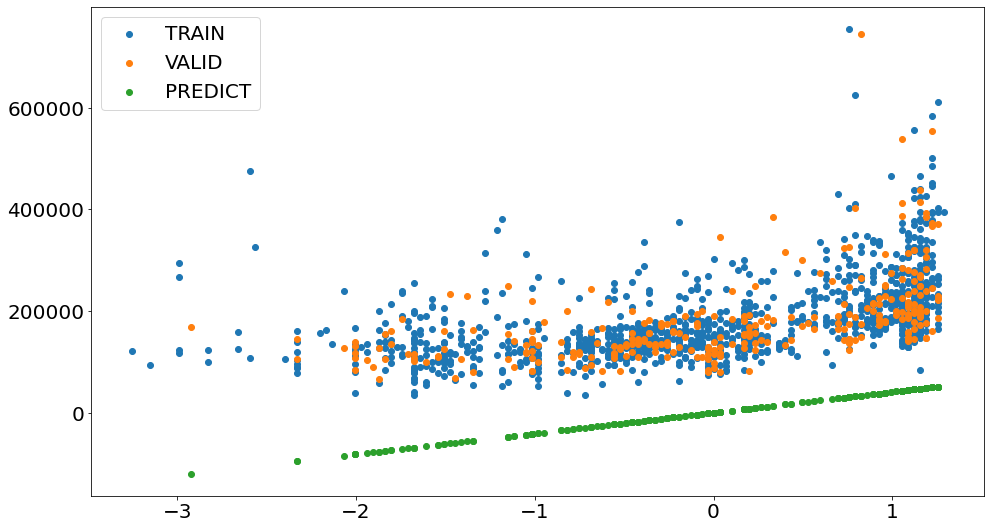

In [66]:
# Visualization of training data, validation data, and forecast data
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std,y_train,label="TRAIN")
plt.scatter(X_valid_std,y_valid,label="VALID")
plt.scatter(X_valid_std,y_pred4,label="PREDICT")
plt.legend()
plt.plot();

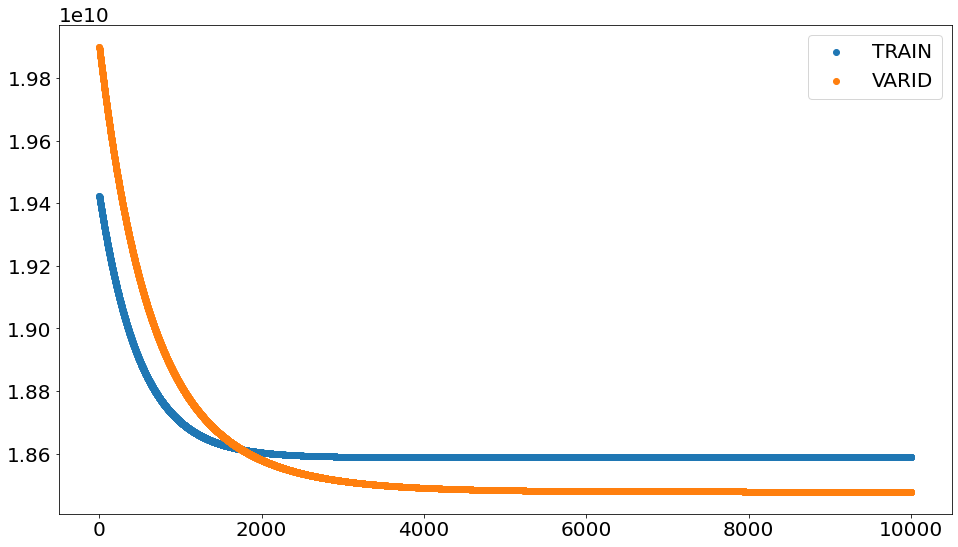

In [49]:
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg4.loss)),reg4.loss,label='TRAIN')
plt.scatter(range(len(reg4.val_loss)),reg4.val_loss,label='VARID')
plt.legend()
plt.plot();

**problem 9 (Advance task) Multidimensional feature quantity**

Please verify how the learning result changes when the square or cube of the feature is used for input.

X.shape: (1460, 2)
y.shape: (1460,)
X_train.shape: (1168, 2)
y_train.shape: (1168,)
X_valid.shape: (292, 2)
y_valid.shape: (292,)
MSE4971463584.1
RMSE70508.6


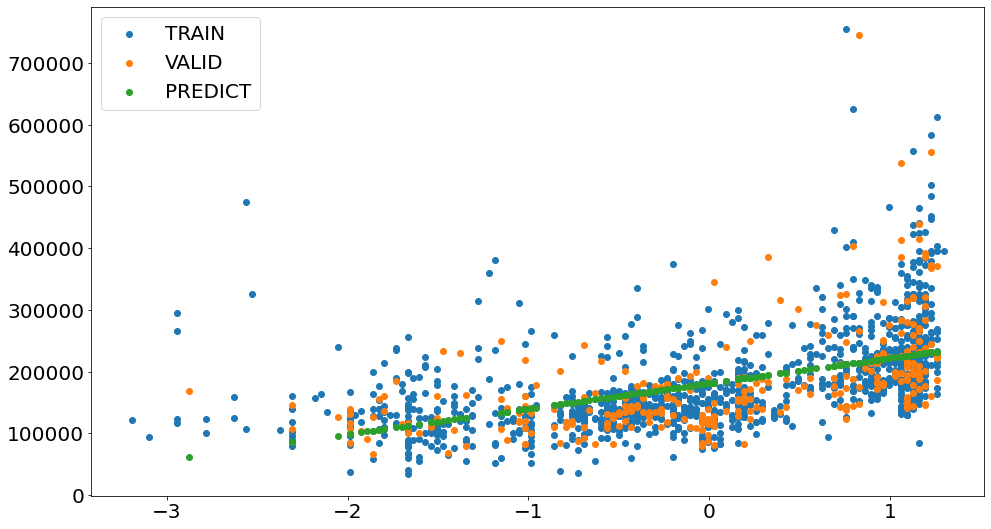

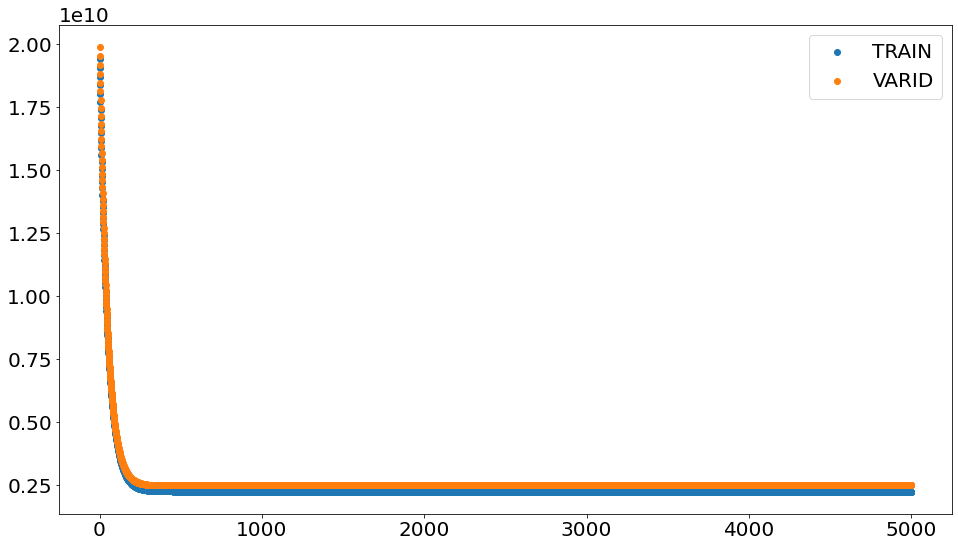

In [67]:
X = train[['YearBuilt', 'YearBuilt']].values
y = train[['SalePrice']].values
y = y.reshape(-1)
print('X.shape:',X.shape)
print('y.shape:',y.shape)

#Add square to feature
X[:,1] =X[:,1]**2
X

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = \
train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_valid.shape:',X_valid.shape)
print('y_valid.shape:',y_valid.shape)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

reg09 = ScratchLinearRegression(num_iter=5000, lr=0.01)

reg09.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred09 = reg09.predict(X_valid_std)

# Visualization of training data, validation data, and forecast data
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std[:,1],y_train,label="TRAIN")
plt.scatter(X_valid_std[:,1],y_valid,label="VALID")
plt.scatter(X_valid_std[:,1],y_pred09,label="PREDICT")
plt.legend()
plt.plot();

mse = MSE(y_pred09, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg09.loss)),reg09.loss,label='TRAIN')
plt.scatter(range(len(reg09.val_loss)),reg09.val_loss,label='VARID')
plt.legend()
plt.plot();



X.shape: (1460, 3)
y.shape: (1460,)
X_train.shape: (1168, 3)
y_train.shape: (1168,)
X_valid.shape: (292, 3)
y_valid.shape: (292,)
MSE4960227014.1
RMSE70428.9


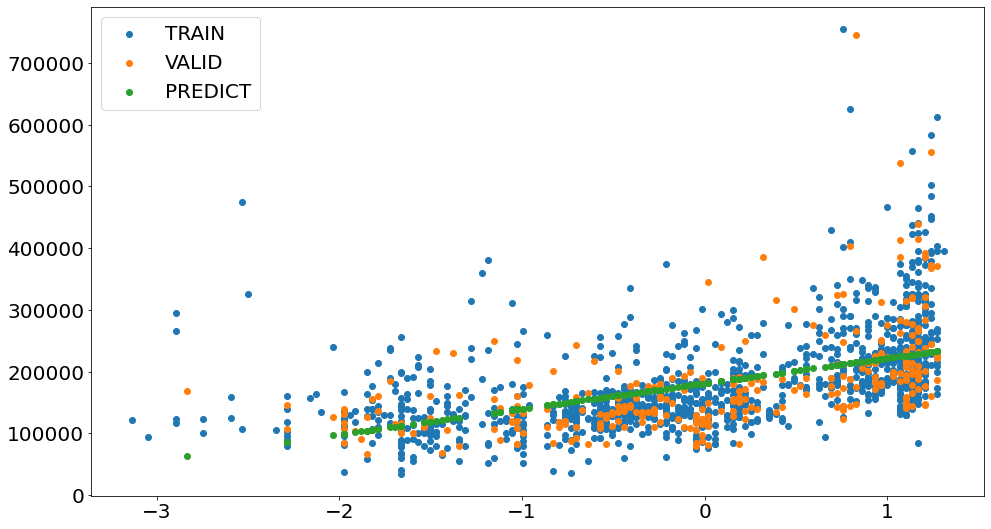

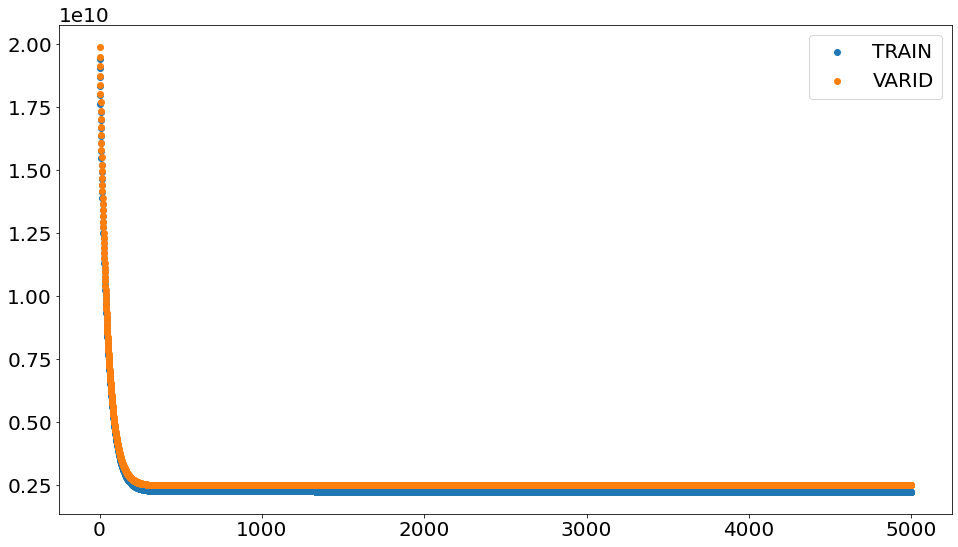

In [68]:
# Add cube to feature
X = train[['YearBuilt','YearBuilt','YearBuilt']].values
y = train[['SalePrice']].values
y = y.reshape(-1)
print('X.shape:',X.shape)
print('y.shape:',y.shape)

X[:,1] = X[:,1]**2
X[:,2] = X[:,2]**3
X

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = \
train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_valid.shape:',X_valid.shape)
print('y_valid.shape:',y_valid.shape)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

reg10 = ScratchLinearRegression(num_iter=5000, lr=0.01)

reg10.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred10 = reg10.predict(X_valid_std)

fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std[:,2],y_train,label="TRAIN")
plt.scatter(X_valid_std[:,2],y_valid,label="VALID")
plt.scatter(X_valid_std[:,2],y_pred10,label="PREDICT")
plt.legend()
plt.plot();

mse = MSE(y_pred10, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg10.loss)),reg10.loss,label='TRAIN')
plt.scatter(range(len(reg10.val_loss)),reg10.val_loss,label='VARID')
plt.legend()
plt.plot();



**problem 10 (Advance task) Derivation of update formula**

The update formula for the steepest descent method was as follows. Explain the process by which this equation is derived.

UPDATED:

$$
\frac{1}{2m}\sum_{i=1}^{m}(x_θ^2ー2yx_θ+y^2)
$$

**problem 11(Advance task) Problem of local optimum solution**

The steepest descent method generally has the problem of locally optimal solutions. However, with linear regression, you can always find the optimal solution if you continue learning. Please explain it using mathematical formulas and graphs for some reason.

**One solution is Isotonic Regression.**
https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_isotonic_regression.html

